In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid
from Models.clustering import siiFCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [3]:
# bandwidth = 0.01
# grid_x    = grid(bandwidth, start=-5, end=15)
# mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])

# # Chọn độ rộng cố định cho Uniform
# width = 2.0

# # Tính a và b sao cho mean = mu
# a_list = mu - width / 2
# b_list = mu + width / 2

# # Gọi lại hàm generateUniform
# F_data = generateUniform(a_list, b_list, grid_x)

In [4]:
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-8, end=25)


std = 0.8
IR = 10
n1, n2 = 10, int(IR * 10)
mu1 = np.random.normal(0, std, n1)
mu2 = np.random.normal(10, std, n2)
sig1 = np.ones_like(mu1)
sig2 = np.ones_like(mu2)

F1 = generateGauss(mu1, sig1, grid_x)
F2 = generateGauss(mu2, sig2, grid_x)
F_data = np.vstack([F1, F2])

In [5]:
cluster=siiFCF.Model(
   grid_x=grid_x,
   seed=42,
    num_clusters=2,
    fuzziness= 2,
    max_iterations= 100,
    tolerance= 1e-6,
    distance_metric= 'L2',
    verbose = True, 
)
cluster.fit(F_data)
U, Theta, J = cluster.get_results()
labels = cluster.get_hard_assignments()

[00] ΔU = 5.80249, Obj = 11.26791
[01] ΔU = 8.69792, Obj = 2.86282
[02] ΔU = 6.40134, Obj = 2.31430
[03] ΔU = 5.03115, Obj = 4.82620
[04] ΔU = 5.01378, Obj = 2.26509
[05] ΔU = 4.93731, Obj = 4.61154
[06] ΔU = 4.93763, Obj = 2.26598
[07] ΔU = 4.90954, Obj = 4.53352
[08] ΔU = 4.91023, Obj = 2.26788
[09] ΔU = 4.89794, Obj = 4.49953
[10] ΔU = 4.89849, Obj = 2.26938
[11] ΔU = 4.89268, Obj = 4.48349
[12] ΔU = 4.89308, Obj = 2.27048
[13] ΔU = 4.89016, Obj = 4.47543
[14] ΔU = 4.89045, Obj = 2.27127
[15] ΔU = 4.88888, Obj = 4.47113
[16] ΔU = 4.88909, Obj = 2.27184
[17] ΔU = 4.88820, Obj = 4.46867
[18] ΔU = 4.88835, Obj = 2.27225
[19] ΔU = 4.88781, Obj = 4.46719
[20] ΔU = 4.88792, Obj = 2.27254
[21] ΔU = 4.88758, Obj = 4.46626
[22] ΔU = 4.88765, Obj = 2.27275
[23] ΔU = 4.88743, Obj = 4.46564
[24] ΔU = 4.88748, Obj = 2.27289
[25] ΔU = 4.88733, Obj = 4.46522
[26] ΔU = 4.88737, Obj = 2.27300
[27] ΔU = 4.88726, Obj = 4.46493
[28] ΔU = 4.88729, Obj = 2.27307
[29] ΔU = 4.88721, Obj = 4.46472
[30] ΔU =

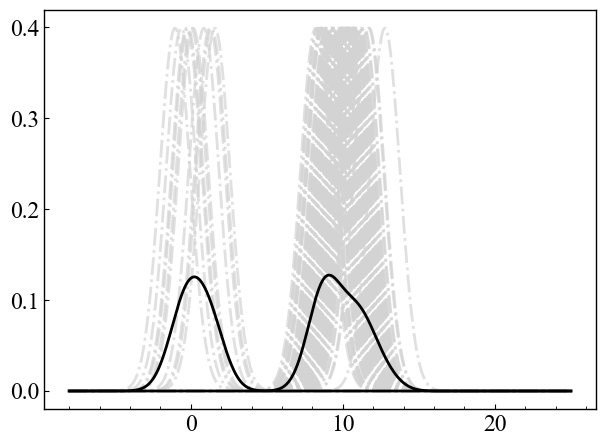

In [6]:
# plotPDF_Theta(grid_x, F_data, theta=Theta)
plt.figure()
temp(fontsize=18, w=10, h=5, u='centimeters')

# pdfs
for i in range(F_data.shape[0]):
	ls = '-.' if labels[i] == 0 else ':'
	color = 'lightgray' if labels[i] == 0 else 'dimgray'
	plt.plot(grid_x, F_data[i], lw=2, color=color, linestyle=ls, alpha=0.7)

# prototype
for j in range(cluster.num_clusters):
	plt.plot(grid_x, Theta[j, :], lw=2, linestyle='-', color='black')

plt.tight_layout()
# plt.savefig("FCF_V4.pdf", bbox_inches='tight')

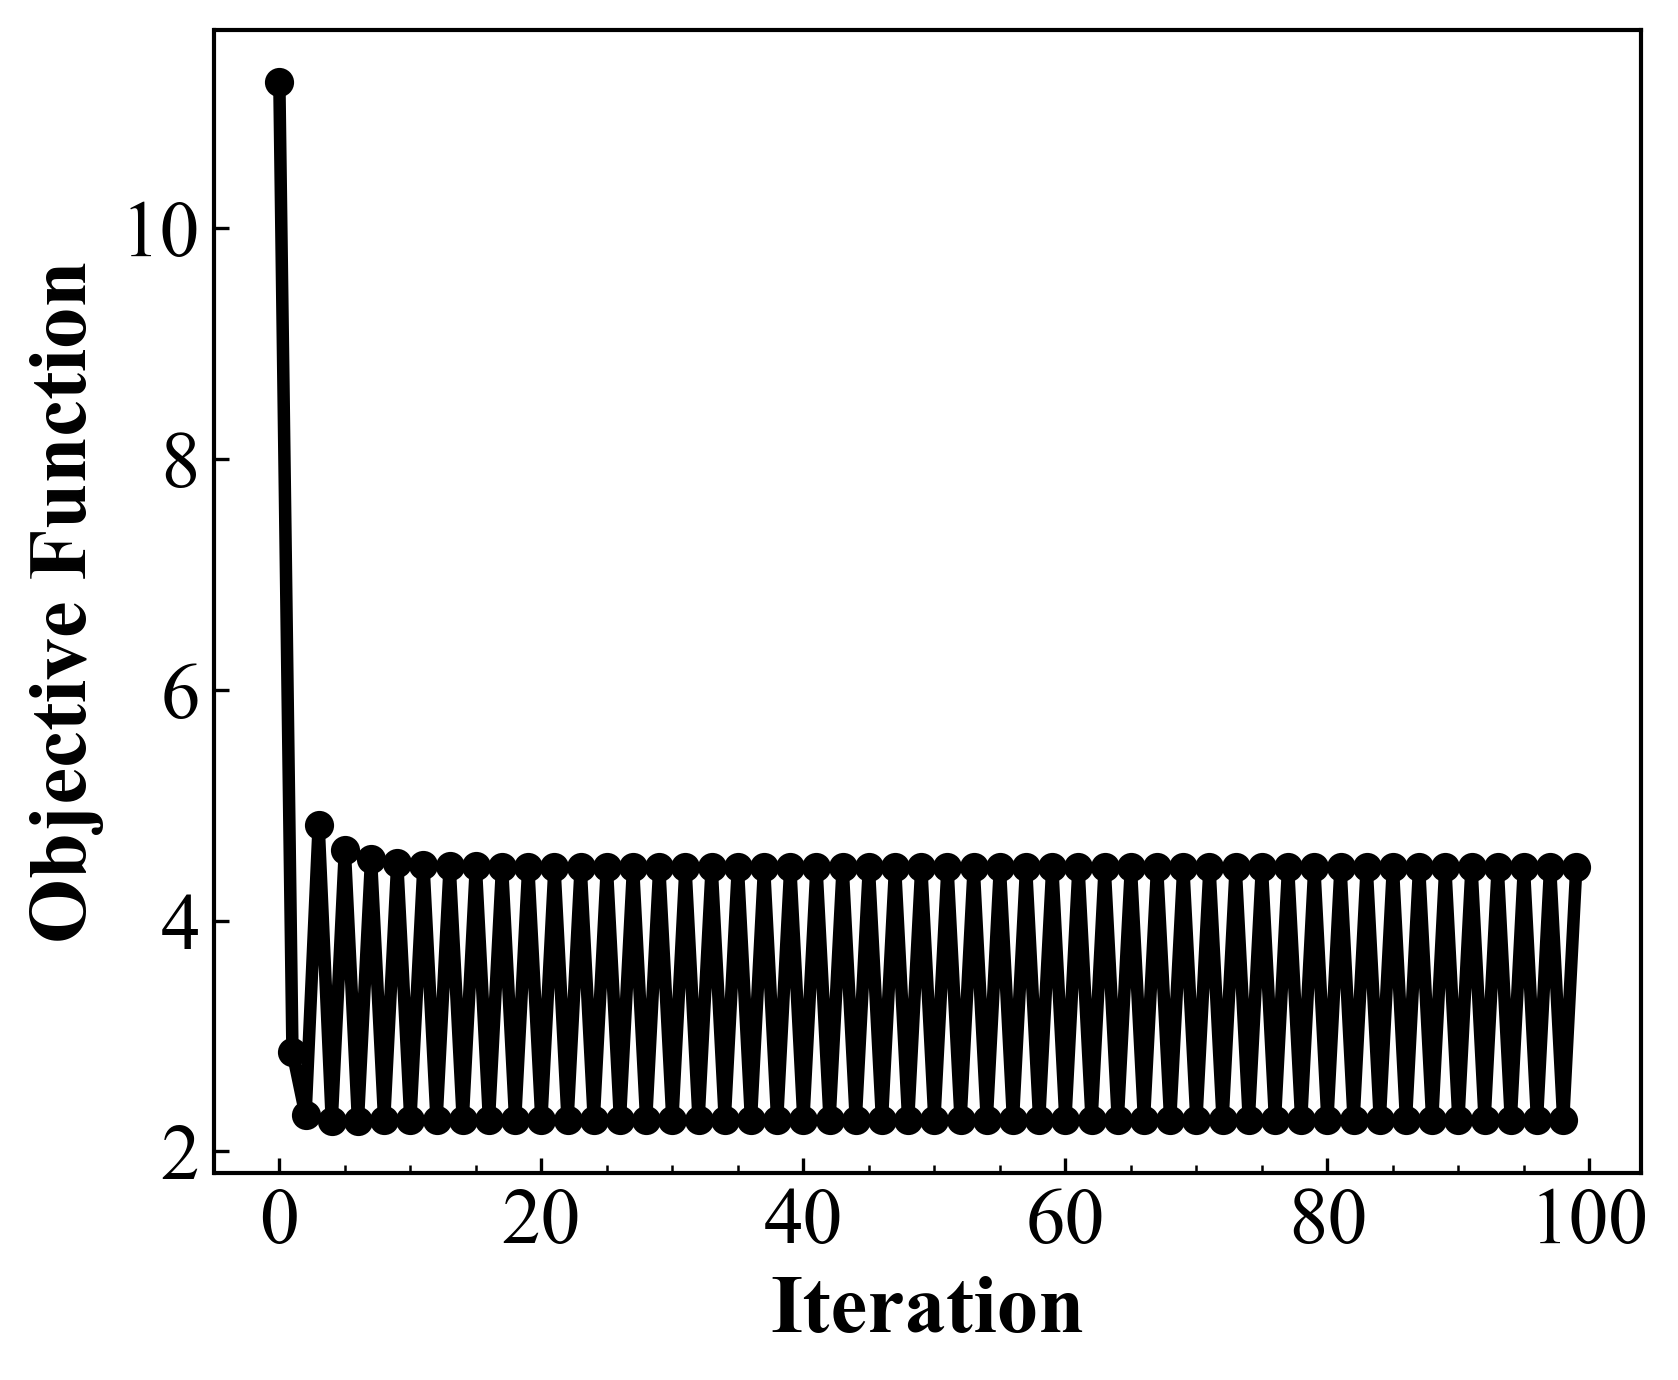

In [7]:
# plot_OF(J)
plt.figure(figsize=(6, 5))
temp(fontsize=20)

plt.plot(J, lw = 3,color = 'black', marker='o')
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.tight_layout()

In [8]:
# from utils.vali import CVI

# evaluator = CVI(distance_metric='BC',bandwidth=bandwidth, grid=grid_x)


# sil = evaluator.silhouette_index(F_data, labels)
# dunn = evaluator.dunn_index(F_data, labels)
# dbi = evaluator.davies_bouldin_index(F_data, labels)

# print(f"Silhouette = {sil:.4f}, Dunn = {dunn:.4f}, DBI = {dbi:.4f}")

In [9]:
# sil_values = plot_silhouette_values(F_data, labels,
#                                     distance_metric='BC',
#                                     bandwidth=bandwidth,
#                                     grid=grid_x)
# print("Silhouette fj:", sil_values)

In [10]:
# num_clusters_range = range(2, 8)
# silhouette_scores, dunn_scores, dbi_scores = [], [], []

# for k in num_clusters_range:
# 	cluster = csiFCF.Model(
# 	grid_x=grid_x,
# 	num_clusters=k,
# 	fuzziness=2,
# 	max_iterations=100,
# 	tolerance=1e-5,
# 	centroid_mode="frechet",
# 	distance_metric='W2',
# 	verbose=False
# 	)
# 	cluster.fit(F_data)
# 	labels = cluster.get_hard_assignments()
# 	evaluator = CVI(distance_metric='W2', bandwidth=bandwidth, grid=grid_x)

# 	sil = evaluator.silhouette_index(F_data, labels)
# 	dunn = evaluator.dunn_index(F_data, labels)
# 	dbi = evaluator.davies_bouldin_index(F_data, labels)

# 	silhouette_scores.append(sil)
# 	dunn_scores.append(dunn)
# 	dbi_scores.append(dbi)

# plot_CVI_with_k(num_clusters_range, silhouette_scores, dunn_scores, dbi_scores)